In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from lifelines import CoxPHFitter
from lifelines import WeibullAFTFitter
from lifelines import LogNormalAFTFitter
from lifelines import LogLogisticAFTFitter
from lifelines import KaplanMeierFitter

## Step 1: Null model

In [279]:
def mod_sel1(data, time_var, event_var, fun):
    fitter = fun
    mod1 = fitter.fit(data[[time_var] + [event_var]],
                      duration_col = time_var, event_col = event_var)
    mod1.print_summary()

## Step 2: Add one variable at a time

In [280]:
## step 2: iter
## vars1: variables from the null model
## vars2: variables to test

def mod_sel2(data, time_var, event_var, terms, fun, alpha = 0.1,
             df = 1, print_model = False):
    
    print('Model Selection using ' + str(fun) + '\n')
    
    fitter = fun
    threshold = chi2.ppf(1 - alpha, df)
    
    mod1 = fitter.fit(data[[time_var] + [event_var]],
                      duration_col= time_var, event_col= event_var)
    ll1 = mod1.log_likelihood_
    print('Step 2\n')
    
    ll_diffs = [] 
    p_vals = []
    for term in terms:
        mod2 = fitter.fit(data[[time_var] + [event_var] + [term]],
                          duration_col= time_var, event_col= event_var)
        ll2 = mod2.log_likelihood_
        res = (2*ll2) - (2*ll1) 
        p = chi2.sf(res, 1)
        ll_diffs.append(res)
        p_vals.append(p)
        
    step2_mod = []
    for j in range(len(ll_diffs)):
        if ll_diffs[j] > threshold:
            print('Variable Fitted: ' + terms[j])
            print('LL difference: ' + str(ll_diffs[j]))
            print('p-value: ' + str(p_vals[j]))
            print('Add ' + terms[j])
            step2_mod.append(terms[j])
            print(' ')
        else:
            print('Variable Fitted: ' + terms[j])
            print('LL difference: ' + str(ll_diffs[j]))
            print('p-value: ' + str(p_vals[j]))
            print('Do not add ' + terms[j])
            print(' ')
    print('Step 2 Variables: ' + str(step2_mod) + '\n')
    
    if print_model == True:
        model = fitter.fit(data[[time_var] + [event_var] + step2_mod],
                           duration_col = time_var, event_col= event_var)
        model.print_summary()

## Step 3: Drop one variable at a time

In [281]:
## step 3: iter
## vars1: variables from the previous step
## vars2: variables to test

def mod_sel3(data, time_var, event_var, terms, fun,
             alpha = 0.1, df= 1, print_model=False): 
    
    print('Step 3 Model Selection using ' + str(fun) + '\n')
    
    fitter = fun
    threshold = chi2.ppf(1 - alpha, df)
    mod1 = fitter.fit(data[[time_var] + [event_var] + terms],
                      duration_col= time_var, event_col= event_var)
    ll1 = mod1.log_likelihood_
    
    
    term_lists = [] 
    for x in range(len(terms)):
        term_l = list(terms)
        term_l.pop(x)
        term_lists.append(term_l)
    
    ll_diffs = []
    p_vals = []
    for term_list in term_lists:
        mod2 = fitter.fit(data[[time_var] + [event_var] + term_list],
                          duration_col = time_var, event_col= event_var)
        ll2 = mod2.log_likelihood_
        res = (2*ll1) - (2*ll2) 
        p = chi2.sf(res, 1)
        ll_diffs.append(res)
        p_vals.append(p)
        
    step3_mod = []
    for k in range(len(ll_diffs)):
        if ll_diffs[k] > threshold:
            print('Variables Fitted: ' + str(term_lists[k]))
            print('LL difference: ' + str(ll_diffs[k]))
            print('p-value: ' + str(p_vals[k]))
            print('Do not drop ' + terms[k])
            step3_mod.append(terms[k])
            print(' ')
        else:
            print('Variables Fitted: ' + str(term_lists[k]))
            print('LL difference: ' + str(ll_diffs[k]))
            print('p-value: ' + str(p_vals[k]))
            print('Drop ' + terms[k])
            print(' ')
    print('Step 3 Variables: ' + str(step3_mod) + '\n')
    
    if print_model == True:
        model = fitter.fit(data[[time_var] + [event_var] + step3_mod],
                           duration_col = time_var, event_col= event_var)
        model.print_summary()

## Step 4: Add one the remaining variables at a time

In [282]:
## step 4: iter
## terms1: variables from the last step
## terms2: variables needed to test

def mod_sel4(data, time_var, event_var, terms1, terms2, fun,
             alpha = 0.1, df = 1, print_model=False): 
    print('Step 4 Model Selection using ' + str(fun) + '\n')
    
    fitter = fun
    threshold = chi2.ppf(1 - alpha, df)
    
    mod1 = fitter.fit(data[[time_var] + [event_var] + terms1],
                      duration_col= time_var, event_col= event_var)
    ll1 = mod1.log_likelihood_
    
    ll_diffs = []
    p_vals = []
    for term in terms2:
        mod2 = fitter.fit(data[[time_var] + [event_var] + terms1 + [term]],
                          duration_col= time_var, event_col= event_var)
        ll2 = mod2.log_likelihood_
        res = (2*ll2) - (2*ll1) 
        p = chi2.sf(res, 1)
        ll_diffs.append(res)
        p_vals.append(p)
        
    step4_mod = []
    for j in range(len(ll_diffs)):
        if ll_diffs[j] > threshold:
            print('Variable Fitted: ' + terms2[j])
            print('LL difference: ' + str(ll_diffs[j]))
            print('p-value: ' + str(p_vals[j]))
            print('Add ' + terms2[j])
            step4_mod.append(terms2[j])
            print(' ')
        else:
            print('Variable Fitted: ' + terms2[j])
            print('LL difference: ' + str(ll_diffs[j]))
            print('p-value: ' + str(p_vals[j]))
            print('Do not add ' + terms2[j])
            print(' ')
    print('Step 4 Variables: ' + str(terms1 + step4_mod) + '\n')
    
    if print_model == True:
        model = fitter.fit(data[[time_var] + [event_var] + terms1 + step4_mod],
                           duration_col= time_var, event_col= event_var)
        model.print_summary()

## Step 5: Drop one variable at a time and print final model

In [283]:
## step 5: iter
## vars1: variables from the previous step
## vars2: variables to test drop

def mod_sel5(data, time_var, event_var, terms, fun, alpha = 0.1, df= 1): 
    print('Step 4 Model Selection using ' + str(fun) + '\n')
    
    fitter = fun
    threshold = chi2.ppf(1 - alpha, df)
    mod1 = fitter.fit(data[[time_var] + [event_var] + terms],
                      duration_col= time_var, event_col= event_var)
    ll1 = mod1.log_likelihood_
    
    term_lists = [] 
    for x in range(len(terms)):
        term_list = list(terms)
        term_list.pop(x)
        term_lists.append(term_list)
    
    ll_diffs = []
    p_vals = []
    for term_l in term_lists:
        mod2 = fitter.fit(data[[time_var] + [event_var] + term_l],
                          duration_col = time_var, event_col= event_var)
        ll2 = mod2.log_likelihood_
        res = (2*ll1) - (2*ll2)
        p = chi2.sf(res, 1)
        ll_diffs.append(res)
        p_vals.append(p)
        
    final_mod = []
    for k in range(len(ll_diffs)):
        if ll_diffs[k] > threshold:
            print('Variables Fitted: ' + str(term_lists[k]))
            print('LL difference: ' + str(ll_diffs[k]))
            print('p-value: ' + str(p_vals[k]))
            print('Do not drop ' + terms[k])
            final_mod.append(terms[k])
            print(' ')
            
        else:
            print('Variables Fitted: ' + str(term_lists[k]))
            print('LL difference: ' + str(ll_diffs[k]))
            print('p-value: ' + str(p_vals[k]))
            print('Drop ' + terms[k])
            print(' ')
            
    print('Step 5 Variables: ' + str(final_mod) + '\n')
    mod_final = fitter.fit(data[[time_var] + [event_var] + final_mod],
                           duration_col = time_var, event_col= event_var)
    mod_final.print_summary()
        

## Steps 1 - 5

In [278]:
def mod_sel(data, time_var, event_var, terms, fun, alpha = 0.1, df= 1):
    print('Model Selection using ' + str(fun) + '\n')
    fitter = fun
    threshold = chi2.ppf(1 - alpha, df)
    print('Step 1\n')
    
    mod2_1 = fitter.fit(data[[time_var] + [event_var]],
                        duration_col= time_var, event_col= event_var)
    ll1 = mod2_1.log_likelihood_
    print('Null LL: ' + str(ll1) + '\n')
    
    print('Step 2\n')
    ## step 2: add one terma at a time
    
    ll_diffs = [] 
    p_vals = []
    for term in terms:
        mod2_2 = fitter.fit(data[[time_var] + [event_var] + [term]],
                            duration_col= time_var, event_col= event_var)
        ll2 = mod2_2.log_likelihood_
        res = (2*ll2) - (2*ll1) 
        p = chi2.sf(res, 1)
        ll_diffs.append(res)
        p_vals.append(p)
        
    step2_mod = []
    for j in range(len(ll_diffs)):
        if ll_diffs[j] > threshold:
            print('Variable Fitted: ' + terms[j])
            print('LL Ratio: ' + str(ll_diffs[j]))
            print('p-value: ' + str(p_vals[j]))
            print('Add ' + terms[j])
            step2_mod.append(terms[j])
            print(' ')
        else:
            print('Variable Fitted: ' + terms[j])
            print('LL Ratio: ' + str(ll_diffs[j]))
            print('p-value: ' + str(p_vals[j]))
            print('Do not add ' + terms[j])
            print(' ')
    print('Step 2 Variables: ' + str(step2_mod) + '\n')
    
    ## Step 3: drop one variable at a time
    
    print('Step 3\n')
    mod3_1 = fitter.fit(data[[time_var] + [event_var] + step2_mod],
                        duration_col= time_var, event_col= event_var)
    ll1 = mod3_1.log_likelihood_
    
    
    term_lists = [] 
    for x in range(len(step2_mod)):
        term_l = list(step2_mod)
        term_l.pop(x)
        term_lists.append(term_l)
    
    ll_diffs = []
    p_vals = []
    for term_list in term_lists:
        mod3_2 = fitter.fit(data[[time_var] + [event_var] + term_list],
                            duration_col = time_var, event_col= event_var)
        ll2 = mod3_2.log_likelihood_
        res = (2*ll1) - (2*ll2) 
        p = chi2.sf(res, 1)
        ll_diffs.append(res)
        p_vals.append(p)
        
    step3_mod = []
    for k in range(len(ll_diffs)):
        if ll_diffs[k] > threshold:
            print('Variables Fitted: ' + str(term_lists[k]))
            print('LL Ratio: ' + str(ll_diffs[k]))
            print('p-value: ' + str(p_vals[k]))
            print('Do not drop ' + step2_mod[k])
            step3_mod.append(step2_mod[k])
            print(' ')
        else:
            print('Variables Fitted: ' + str(term_lists[k]))
            print('LL Ratio: ' + str(ll_diffs[k]))
            print('p-value: ' + str(p_vals[k]))
            print('Drop ' + step2_mod[k])
            print(' ')
    print('Step 3 Variables: ' + str(step3_mod) + '\n')
    
    ## Step 4: drop one variable at a time
    ## vars1: varibales from previous step, vars2:variables to be tested
    print('Step 4\n')
    step4_terms = [x for x in terms if not x in step3_mod]
    
    mod4_1 = fitter.fit(data[[time_var] + [event_var] + step3_mod],
                        duration_col= time_var, event_col= event_var)
    ll1 = mod4_1.log_likelihood_
    
    ll_diffs = []
    p_vals = []
    for term in step4_terms:
        mod4_2 = fitter.fit(data[[time_var] + [event_var] + step3_mod + [term]],
                            duration_col= time_var, event_col= event_var)
        ll2 = mod4_2.log_likelihood_
        res = (2*ll2) - (2*ll1) 
        p = chi2.sf(res, 1)
        ll_diffs.append(res)
        p_vals.append(p)
        
    step4_mod = []
    for j in range(len(ll_diffs)):
        if ll_diffs[j] > threshold:
            print('Variable Fitted: ' + step4_terms[j])
            print('LL Ratio: ' + str(ll_diffs[j]))
            print('p-value: ' + str(p_vals[j]))
            print('Add ' + step4_terms[j])
            step4_mod.append(step4_terms[j])
            print(' ')
        else:
            print('Variable Fitted: ' + step4_terms[j])
            print('LL Ratio: ' + str(ll_diffs[j]))
            print('p-value: ' + str(p_vals[j]))
            print('Do not add ' + step4_terms[j])
            print(' ')
    step4_mod2 = step3_mod + step4_mod
    print('Step 4 Variables: ' + str(step4_mod2) + '\n')

    
    ## step 5: drop one variable at a time
    print('Step 5\n')
    mod5_1 = fitter.fit(data[[time_var] + [event_var] + step4_mod2],
                        duration_col= time_var, event_col= event_var)
    ll1 = mod5_1.log_likelihood_
    
    term_lists = [] 
    for x in range(len(step4_mod2)):
        term_list = list(step4_mod2)
        term_list.pop(x)
        term_lists.append(term_list)
    
    ll_diffs = []
    p_vals = []
    for term_l in term_lists:
        mod5_2 = fitter.fit(data[[time_var] + [event_var] + term_l],
                            duration_col = time_var, event_col= event_var)
        ll2 = mod5_2.log_likelihood_
        res = (2*ll1) - (2*ll2)
        p = chi2.sf(res, 1)
        ll_diffs.append(res)
        p_vals.append(p)
        
    final_mod = []
    for k in range(len(ll_diffs)):
        if ll_diffs[k] > threshold:
            print('Variables Fitted: ' + str(term_lists[k]))
            print('LL Ratio: ' + str(ll_diffs[k]))
            print('p-value: ' + str(p_vals[k]))
            print('Do not drop ' + str(step4_mod2[k]))
            final_mod.append(step4_mod2[k])
            print(' ')
            
        else:
            print('Variables Fitted: ' + str(term_lists[k]))
            print('LL Ratio: ' + str(ll_diffs[k]))
            print('p-value: ' + str(p_vals[k]))
            print('Drop ' + str(step4_mod2[k]))
            print(' ')
            
    print('Step 5 Variables: ' + str(final_mod) + '\n')
    mod_final = fitter.fit(data[[time_var] + [event_var] + final_mod],
                           duration_col = time_var, event_col= event_var)
    mod_final.print_summary()

## AFT Model Selection

In [284]:
def aft_sel(data, time_var, event_var):
    
    llf = LogLogisticAFTFitter()
    llf_mod = llf.fit(data, time_var, event_var)
    
    lnf = LogNormalAFTFitter()
    lnf_mod = lnf.fit(data, time_var, event_var)
    
    wf = WeibullAFTFitter()
    wf_mod = wf.fit(data, time_var, event_var)
    
    print('Log-Logistic:' + str(llf_mod.log_likelihood_))
    print('Log-Normal:' + str(lnf_mod.log_likelihood_))
    print('Weibull:' + str(wf_mod.log_likelihood_) + '\n')
    
    print(max([llf_mod.log_likelihood_, lnf_mod.log_likelihood_, wf_mod.log_likelihood_])) 
    ## select the model corresponding to the maximum log-likelihood

### Veteran Data

In [268]:
veteran = pd.read_csv('/Users/Julian/Documents/STAT 311/Data/veteran.csv')
veteran.head()

,trt,celltype,time,status,karno,diagtime,age,prior
0,1,squamous,72,1,60,7,69,0
1,1,squamous,411,1,70,5,64,10
2,1,squamous,228,1,60,3,38,0
3,1,squamous,126,1,60,9,63,10
4,1,squamous,118,1,70,11,65,10


In [269]:
veteran['celltype'].value_counts()

smallcell    48
squamous     35
large        27
adeno        27
Name: celltype, dtype: int64

In [270]:
## indicator for cell type - adeno is baseline
cell_small = [] 
cell_squamous = [] 
cell_large = [] 

for i in veteran['celltype']:
    if i == 'smallcell':   
        cell_small.append(1)
        cell_squamous.append(0)
        cell_large.append(0)
    elif i == 'squamous':   
        cell_small.append(0)
        cell_squamous.append(1)
        cell_large.append(0)
    elif i == 'large':   
        cell_small.append(0)
        cell_squamous.append(0)
        cell_large.append(1)
    else:
        cell_small.append(0)
        cell_squamous.append(0)
        cell_large.append(0)

veteran['cell_small'] = cell_small
veteran['cell_squamous'] = cell_squamous
veteran['cell_large'] = cell_large

veteran['trt'] = veteran['trt'] - 1
veteran['prior'] = veteran['prior']/10

veteran = veteran[['trt', 'time', 'status', 'karno', 'diagtime', 'age',
       'prior', 'cell_small', 'cell_squamous', 'cell_large']]

veteran.head()

,trt,time,status,karno,diagtime,age,prior,cell_small,cell_squamous,cell_large
0,0,72,1,60,7,69,0.0,0,1,0
1,0,411,1,70,5,64,1.0,0,1,0
2,0,228,1,60,3,38,0.0,0,1,0
3,0,126,1,60,9,63,1.0,0,1,0
4,0,118,1,70,11,65,1.0,0,1,0


##### Check proportiona Hazards assumption

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.

<lifelines.StatisticalResult>
         test_name = proportional_hazard_test
 null_distribution = chi squared
degrees_of_freedom = 1

---
                    test_statistic      p  -log2(p)
age           km              5.42   0.02      5.65
              rank            5.53   0.02      5.74
cell_large    km              0.03   0.87      0.20
              rank            0.02   0.89      0.16
ce

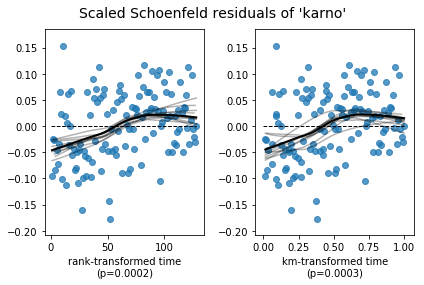

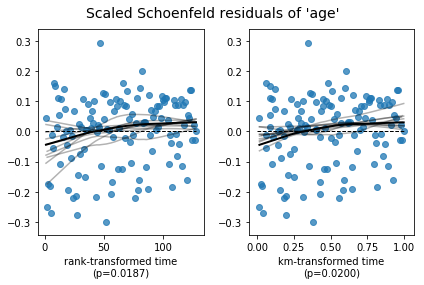

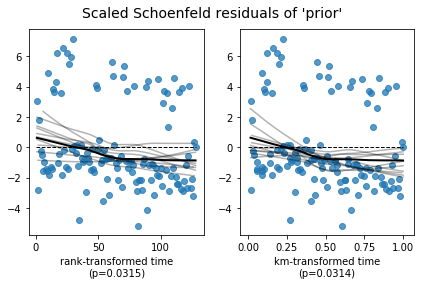

In [287]:
cph = CoxPHFitter()
cph.fit(veteran, 'time', 'status')
cph.check_assumptions(veteran, p_value_threshold= 0.05, show_plots= True)

In [271]:
kmf = KaplanMeierFitter()
kmf.fit(veteran['time'], veteran['status'])
kt_sf = kmf.survival_function_ ## veteran survival function
kt_sf= kt_sf[1:len(kt_sf)-1]

ls = []
for x in kt_sf['KM_estimate']:
    ls.append(math.log(x/(1-x)))

lt= []
for x in kt_sf.index:
    lt.append(math.log(x))

kt_sf['ln[s/(s-1)]'] = ls
kt_sf['ln(t)'] = lt
#kt_sf

/Users/Julian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Julian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


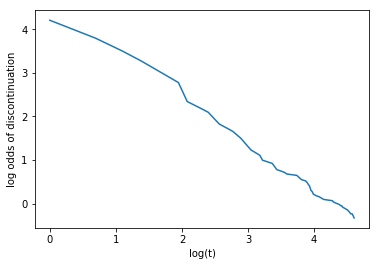

In [272]:
plt.xlabel('log(t)')
plt.ylabel('log odds of discontinuation')
plt.plot(kt_sf['ln(t)'], kt_sf['ln[s/(s-1)]']) ## this is log-logistic

In [273]:
lp= []
for x in kt_sf['KM_estimate']:
    k = (1 - x)
    lp.append(norm.ppf(k))
    
kt_sf['psi(t)'] = lp
#kt_sf

/Users/Julian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


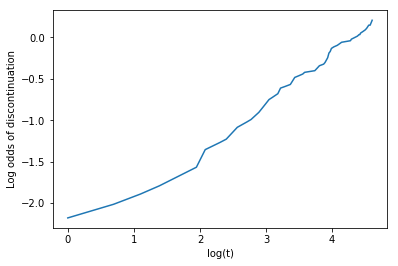

In [274]:
## ln-normal
plt.xlabel('log(t)')
plt.ylabel('Log odds of discontinuation')
plt.plot(kt_sf['ln(t)'], kt_sf['psi(t)']) ## a log normal model can be used

In [34]:
aft_sel(veteran, 'time', 'status') ## use log logistic with the veteran data

Log-Logistic:-711.9425568192644
Log-Normal:-714.6349369510474
Weibull:-715.5513293540253

-711.9425568192644


## Dataset 2

In [116]:
from lifelines.datasets import load_gbsg2 

In [196]:
gbsg = load_gbsg2()
gbsg.head()

,horTh,age,menostat,tsize,tgrade,pnodes,progrec,estrec,time,cens
0,no,70,Post,21,II,3,48,66,1814,1
1,yes,56,Post,12,II,7,61,77,2018,1
2,yes,58,Post,35,II,9,52,271,712,1
3,yes,59,Post,17,II,4,60,29,1807,1
4,no,73,Post,35,II,1,26,65,772,1


In [190]:
gbsg.describe()

,age,tsize,pnodes,progrec,estrec,time,cens
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,53.052478,29.329446,5.010204,109.995627,96.252187,1124.489796,0.435860
std,10.120739,14.296217,5.475483,202.331552,153.083963,642.791948,0.496231
min,21.000000,3.000000,1.000000,0.000000,0.000000,8.000000,0.000000
25%,46.000000,20.000000,1.000000,7.000000,8.000000,567.750000,0.000000
50%,53.000000,25.000000,3.000000,32.500000,36.000000,1084.000000,0.000000
75%,61.000000,35.000000,7.000000,131.750000,114.000000,1684.750000,1.000000
max,80.000000,120.000000,51.000000,2380.000000,1144.000000,2659.000000,1.000000


In [43]:
gbsg['horTh'].value_counts()

no     440
yes    246
Name: horTh, dtype: int64

In [44]:
gbsg['menostat'].value_counts()

Post    396
Pre     290
Name: menostat, dtype: int64

In [45]:
gbsg['tgrade'].value_counts()

II     444
III    161
I       81
Name: tgrade, dtype: int64

In [197]:
## create indicators for hormonal therapy

horTh2 = []
for x in gbsg['horTh']:
    if x == 'yes':
        horTh2.append(1)
    else:
        horTh2.append(0)
        
gbsg['horTh'] = horTh2

In [198]:
## create indicators for menostat
## 1 if post, 0 for pre

menostat2 = []
for x in gbsg['menostat']:
    if x == 'Post':
        menostat2.append(1)
    else:
        menostat2.append(0)
        
gbsg['menostat'] = menostat2

In [199]:
## create indicators for tgrade
## grade 3 and 4

tgrade2 = []
tgrade3 = []
for x in gbsg['tgrade']:
    if x == 'II':
        tgrade2.append(1)
        tgrade3.append(0)
    elif x == 'III':
        tgrade2.append(0)
        tgrade3.append(1)
    else:
        tgrade2.append(0)
        tgrade3.append(0)
        
gbsg['tgrade2'] = tgrade2
gbsg['tgrade3'] = tgrade3

In [200]:
gbsg = gbsg.drop(['tgrade'], axis = 1)
gbsg.head()

,horTh,age,menostat,tsize,pnodes,progrec,estrec,time,cens,tgrade2,tgrade3
0,0,70,1,21,3,48,66,1814,1,1,0
1,1,56,1,12,7,61,77,2018,1,1,0
2,1,58,1,35,9,52,271,712,1,1,0
3,1,59,1,17,4,60,29,1807,1,1,0
4,0,73,1,35,1,26,65,772,1,1,0


#### Check proportional hazars assumption

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.

<lifelines.StatisticalResult>
         test_name = proportional_hazard_test
 null_distribution = chi squared
degrees_of_freedom = 1

---
               test_statistic    p  -log2(p)
age      km              2.94 0.09      3.53
         rank            2.80 0.09      3.41
estrec   km              1.00 0.32      1.66
         rank            1.41 0.23      2.09
horTh    km              0.20 0.65   

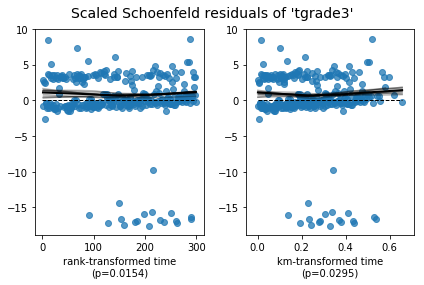

In [286]:
cph = CoxPHFitter()
cph.fit(gbsg, 'time', 'cens')
cph.check_assumptions(gbsg, p_value_threshold= 0.05, show_plots= True)

In [69]:
kmf = KaplanMeierFitter()
kmf.fit(gbsg['time'], gbsg['cens'])
kt_sf = kmf.survival_function_ ## veteran survival function
kt_sf= kt_sf[72:len(kt_sf)]

ls = []
for x in kt_sf['KM_estimate']:
    ls.append(math.log(x/(1-x)))

lt= []
for x in kt_sf.index:
    lt.append(math.log(x))

kt_sf['ln[s/(s-1)]'] = ls
kt_sf['ln(t)'] = lt

/Users/Julian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Julian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


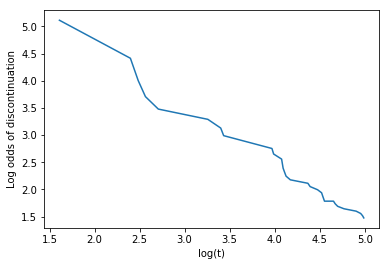

In [265]:
plt.xlabel('log(t)')
plt.ylabel('Log odds of discontinuation')
plt.plot(kt_sf['ln(t)'], kt_sf['ln[s/(s-1)]']) ## this is quite log-logistic

In [71]:
lp= []
for x in kt_sf['KM_estimate']:
    k = (1 - x)
    lp.append(norm.ppf(k))
    
kt_sf['psi(t)'] = lp
#kt_sf

/Users/Julian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


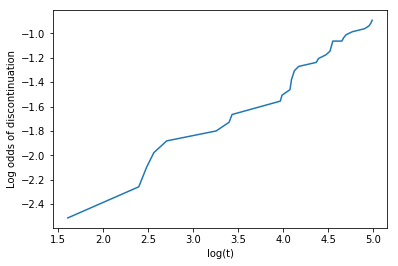

In [266]:
## ln-normal
plt.xlabel('log(t)')
plt.ylabel('Log odds of discontinuation')
plt.plot(kt_sf['ln(t)'], kt_sf['psi(t)']) ## a log normal model can be used

In [155]:
aft_sel(gbsg, 'time', 'cens') ## use log normal here

Log-Logistic:-2565.5098360835404
Log-Normal:-2558.5813924298027
Weibull:-2579.6948362244207

-2558.5813924298027


## Lung Cancer

In [248]:
from lifelines.datasets import load_lung
lung = load_lung()
lung = lung.dropna()
lung.shape

(167, 10)

In [249]:
lung['status'] = lung['status'] - 1
lung.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
1,3.0,455,1,68,1,0.0,90.0,90.0,1225.0,15.0
3,5.0,210,1,57,1,1.0,90.0,60.0,1150.0,11.0
5,12.0,1022,0,74,1,1.0,50.0,80.0,513.0,0.0
6,7.0,310,1,68,2,2.0,70.0,60.0,384.0,10.0
7,11.0,361,1,71,2,2.0,60.0,80.0,538.0,1.0


In [242]:
lung['ph.ecog'].value_counts()

1.0    81
0.0    47
2.0    38
3.0     1
Name: ph.ecog, dtype: int64

In [250]:
## create indicators for ECOG
ecog1 = [] ## ECOG of 1
ecog2p = [] ## ECOG 2+(2 and 3)
for x in lung['ph.ecog']:
    if x == 1:
        ecog1.append(1)
        ecog2p.append(0)
    elif x == 2 or x == 3:
        ecog1.append(0)
        ecog2p.append(1)
    else:
        ecog1.append(0)
        ecog2p.append(0)
        
lung['ecog1'] = ecog1
lung['ecog2p'] = ecog2p

lung = lung.drop(['ph.ecog'], axis = 1)
lung.head()

,inst,time,status,age,sex,ph.karno,pat.karno,meal.cal,wt.loss,ecog1,ecog2p
1,3.0,455,1,68,1,90.0,90.0,1225.0,15.0,0,0
3,5.0,210,1,57,1,90.0,60.0,1150.0,11.0,1,0
5,12.0,1022,0,74,1,50.0,80.0,513.0,0.0,1,0
6,7.0,310,1,68,2,70.0,60.0,384.0,10.0,0,1
7,11.0,361,1,71,2,60.0,80.0,538.0,1.0,0,1


##### Check Cox Proportional Hazards Assumption`

In [285]:
cph = CoxPHFitter()
cph.fit(lung, 'time', 'status')
cph.check_assumptions(lung, p_value_threshold= 0.05, show_plots= True)

Proportional hazard assumption looks okay.


## Use Function with the datasets above

#### Veteran example

In [131]:
veteran.columns

Index(['trt', 'time', 'status', 'karno', 'diagtime', 'age', 'prior',
       'cell_small', 'cell_squamous', 'cell_large'],
      dtype='object')

In [277]:
mod_sel(veteran, 'time', 'status', ['trt', 'karno', 'diagtime', 'age', 'prior',
       'cell_small', 'cell_squamous', 'cell_large'], LogLogisticAFTFitter())

Model Selection using <lifelines.LogLogisticAFTFitter>

Step 1

Null LL: -750.2657888574508

Step 2

Variable Fitted: trt
LL Ratio: 0.8951726826337563
p-value: 0.34407939869021964
Do not add trt
 
Variable Fitted: karno
LL Ratio: 60.17566345044929
p-value: 8.675829579229974e-15
Add karno
 
Variable Fitted: diagtime
LL Ratio: 0.7307296780541037
p-value: 0.3926467736511239
Do not add diagtime
 
Variable Fitted: age
LL Ratio: 0.030998327875749965
p-value: 0.8602441185388373
Do not add age
 
Variable Fitted: prior
LL Ratio: 0.07883513928277353
p-value: 0.7788822439283708
Do not add prior
 
Variable Fitted: cell_small
LL Ratio: 9.71163460038224
p-value: 0.001831050784947594
Add cell_small
 
Variable Fitted: cell_squamous
LL Ratio: 5.7168503690013495
p-value: 0.016802846026119825
Add cell_squamous
 
Variable Fitted: cell_large
LL Ratio: 8.915634053476424
p-value: 0.002827396304339703
Add cell_large
 
Step 2 Variables: ['karno', 'cell_small', 'cell_squamous', 'cell_large']

Step 3

Variables 

##### GBSG Example

In [202]:
mod_sel(gbsg, 'time', 'cens', ['horTh', 'age', 'menostat', 'tsize', 'pnodes', 'progrec', 'estrec',
                                 'tgrade2', 'tgrade3'], LogNormalAFTFitter())

Model Selection using <lifelines.LogNormalAFTFitter>

Step 1

Null LL: -2618.8850036762237

Step 2

Variable Fitted: horTh
LL Ratio: 9.54051028127924
p-value: 0.0020098585780372598
Add horTh
 
Variable Fitted: age
LL Ratio: 1.878787867376559
p-value: 0.1704719784837989
Do not add age
 
Variable Fitted: menostat
LL Ratio: 0.0082452167325755
p-value: 0.927648986567506
Do not add menostat
 
Variable Fitted: tsize
LL Ratio: 17.6513230983046
p-value: 2.6533063333114965e-05
Add tsize
 
Variable Fitted: pnodes
LL Ratio: 58.36177985339509
p-value: 2.1808690347481885e-14
Add pnodes
 
Variable Fitted: progrec
LL Ratio: 34.72811507656388
p-value: 3.791166734127728e-09
Add progrec
 
Variable Fitted: estrec
LL Ratio: 6.518414370294522
p-value: 0.010676314825462125
Add estrec
 
Variable Fitted: tgrade2
LL Ratio: 0.04086326297147025
p-value: 0.8398020890830521
Do not add tgrade2
 
Variable Fitted: tgrade3
LL Ratio: 13.382660833534828
p-value: 0.000253961184335871
Add tgrade3
 
Step 2 Variables: ['hor

In [163]:
aft_aic = -2*(-2560.41) + 2*(7)
aft_aic

5134.82

#### Lung Cancer Example

In [179]:
lung.columns

Index(['inst', 'time', 'status', 'age', 'sex', 'ph.ecog', 'ph.karno',
       'pat.karno', 'meal.cal', 'wt.loss'],
      dtype='object')

In [258]:
mod_sel(lung, 'time', 'status', ['age', 'sex', 'ph.karno',
       'pat.karno', 'meal.cal', 'wt.loss', 'ecog1', 'ecog2p'], CoxPHFitter())

Model Selection using <lifelines.CoxPHFitter>

Step 1

Null LL: -508.1167985890332

Step 2

Variable Fitted: age
LL Ratio: 3.523554509065775
p-value: 0.060502560783663596
Add age
 
Variable Fitted: sex
LL Ratio: 6.2467749525039835
p-value: 0.012441963653928915
Add sex
 
Variable Fitted: ph.karno
LL Ratio: 3.2102560389666905
p-value: 0.07317803130504656
Add ph.karno
 
Variable Fitted: pat.karno
LL Ratio: 8.878942650720319
p-value: 0.002884785695995085
Add pat.karno
 
Variable Fitted: meal.cal
LL Ratio: 0.24857422438799404
p-value: 0.6180808038571679
Do not add meal.cal
 
Variable Fitted: wt.loss
LL Ratio: 0.0005235070301523592
p-value: 0.9817457737437024
Do not add wt.loss
 
Variable Fitted: ecog1
LL Ratio: 0.38219251817440636
p-value: 0.536432167283543
Do not add ecog1
 
Variable Fitted: ecog2p
LL Ratio: 10.989125035158168
p-value: 0.000916480678017047
Add ecog2p
 
Step 2 Variables: ['age', 'sex', 'ph.karno', 'pat.karno', 'ecog2p']

Step 3

Variables Fitted: ['sex', 'ph.karno', 'pat.ka